In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import pyecharts
plt.style.use('ggplot')
%matplotlib inline

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点

In [200]:
data_dm = pd.read_csv(r"C:\Users\Mr.You\Desktop\y\shixiseng\datamining.csv")
data_ml = pd.read_csv(r"C:\Users\Mr.You\Desktop\y\shixiseng\machinelearning.csv")
data_al = pd.read_csv(r"C:\Users\Mr.You\Desktop\y\shixiseng\mlalgorithm.csv")

data = pd.concat([data_dm, data_ml, data_al], ignore_index=True)

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 27 columns):
auth_capital      906 non-null object
city              974 non-null object
com_class         954 non-null object
com_fullname      974 non-null object
com_id            906 non-null object
com_intro         974 non-null object
com_links         978 non-null object
com_location      978 non-null object
com_logo          974 non-null object
com_name          974 non-null object
com_website       865 non-null object
com_welfare       978 non-null object
day_per_week      978 non-null object
detailed_intro    912 non-null object
est_date          906 non-null object
industry          960 non-null object
job_academic      978 non-null object
job_deadline      978 non-null object
job_detail        681 non-null object
job_links         978 non-null object
job_title         978 non-null object
num_employee      972 non-null object
released_time     978 non-null object
tag               978

In [202]:
data.drop_duplicates(subset='job_links', inplace=True)
data.shape

(878, 27)

In [203]:
data_clean = data.drop(['com_id', 'com_links', 'com_location', 'com_website', 
                 'com_welfare', 'detailed_intro', 'job_detail'], axis=1)

In [204]:
def clean(x):
    if ',' in str(x):
        return x.replace(',','')
    else: return x
data['auth_capital'] = data['auth_capital'].apply(clean)

In [205]:
auth_capital = data['auth_capital'].str.extract('([0-9.]+)').astype('float')

In [206]:
auth_capital['unit'] = data['auth_capital'].str.extract('[0-9.]+(.*)')

In [207]:
auth_capital['unit'].unique()

array(['万美元', '万人民币', '万元美元', nan, '万元人民币', '万人民币元', ' 万元', ' 万元 人民币',
       '万元', '万', ' 万元 美元', ' 万元人民币', '万元港元（港币）', ' 万美元', '万港币', '万香港元',
       '万欧元', ' 万人民币', ' 万', ' 万元 港元（港币）'], dtype=object)

In [208]:
def get_ex_rate(string):
    if string == None:
        return np.nan
    if '人民币' in str(string):
        return 1.00
    elif '港' in str(string):
        return 0.80
    elif '美元' in str(string):
        return 6.29
    elif '欧元' in str(string):
        return 7.73
    elif '万' in str(string):
        return 1.00
    else:
        return np.nan
    
auth_capital['ex_rate'] = auth_capital['unit'].apply(get_ex_rate)

In [209]:
data_clean['auth_capital'] = auth_capital[0] * auth_capital['ex_rate']

In [210]:
data_clean['auth_capital'].head()

0    235875.0000
1     27570.9972
2       314.5000
3     28430.8000
4     28430.8000
Name: auth_capital, dtype: float64

In [211]:
data['day_per_week'].unique()

array(['4天/周', '5天/周', '3天/周', '2天/周', '6天/周'], dtype=object)

In [212]:
data_clean.loc[data['day_per_week'] == '2天/周', 'day_per_week'] = 2
data_clean.loc[data['day_per_week'] == '3天/周', 'day_per_week'] = 3
data_clean.loc[data['day_per_week'] == '4天/周', 'day_per_week'] = 4
data_clean.loc[data['day_per_week'] == '5天/周', 'day_per_week'] = 5
data_clean.loc[data['day_per_week'] == '6天/周', 'day_per_week'] = 6

In [213]:
data.num_employee.unique()

array(['2000人以上', '500-2000人', nan, '50-150人', '15-50人', '150-500人',
       '少于15人', '5000人以上'], dtype=object)

In [214]:
data_clean.loc[data['num_employee'] == '少于15人', 'num_employee'] = '小型企业'
data_clean.loc[data['num_employee'] == '15-50人', 'num_employee'] = '小型企业'
data_clean.loc[data['num_employee'] == '50-150人', 'num_employee'] = '小型企业'
data_clean.loc[data['num_employee'] == '150-500人', 'num_employee'] = '中型企业'
data_clean.loc[data['num_employee'] == '500-2000人', 'num_employee'] = '中型企业'
data_clean.loc[data['num_employee'] == '2000人以上', 'num_employee'] = '大型企业'
data_clean.loc[data['num_employee'] == '5000人以上', 'num_employee'] = '大型企业'
data_clean.loc[data['num_employee'].isna(), 'num_employee'] = np.nan

In [215]:
data.time_span.unique()

array(['3个月', '4个月', '6个月', '7个月', '5个月', '9个月', '8个月', '10个月', '12个月',
       '13个月', '18个月', '14个月', '16个月', '11个月', '15个月', '2个月', '17个月', '1个月'], dtype=object)

In [216]:
maping = {}
for i in range(1,19):
    maping[str(i) + '个月'] = i
    
data_clean['time_span'] = data['time_span'].map(maping)

In [217]:
data_clean.head(6)

,auth_capital,city,com_class,com_fullname,com_intro,com_logo,com_name,day_per_week,est_date,industry,job_academic,job_deadline,job_links,job_title,num_employee,released_time,tag,time_span,update_time,wage
0,235875.0000,北京,公司类型：有限责任公司(台港澳法人独资),淘宝（中国）软件有限公司,淘宝网是亚太地区较大的网络零售、商圈,https://sxsimg.xiaoyuanzhao.com/FB/BC/FBDB6AC6...,淘宝,4,成立日期：2004-12-07,计算机/互联网,硕士,2018-04-13,https://www.shixiseng.com/intern/inn_g2vpcs8lukcr,【淘宝】算法工程师/算法专家,大型企业,7分钟前,数据挖掘,3,2018-03-21 10:48:06,200-201/天
1,27570.9972,上海,公司类型：股份有限公司(上市),游族网络股份有限公司,全球领先的互动娱乐供应商,https://sxsimg.xiaoyuanzhao.com/BD/6D/BD305709...,游族网络,5,成立日期：1995-09-22,计算机/互联网,本科,2020-12-31,https://www.shixiseng.com/intern/inn_46watgzrvqsg,大数据挖掘工程师 （2018校园）,中型企业,18分钟前,软件,4,2018-03-21 10:37:22,160-280/天
2,314.5000,广州,公司类型：有限责任公司(台港澳法人独资),广州网易互动娱乐有限公司,国内中国领先的互联网技术公司，游戏行业领导者。,https://sxsimg.xiaoyuanzhao.com/company_logo/2...,网易游戏,4,成立日期：2002-10-15,互联网,本科,2018-03-31,https://www.shixiseng.com/intern/inn_wnfrd8o7wly2,数据挖掘研究实习生（AI方向）,大型企业,32分钟前,数据挖掘,4,2018-03-21 10:23:45,130-150/天
3,28430.8000,北京,公司类型：有限责任公司(外国法人独资),百度在线网络技术（北京）有限公司,全球最大的中文搜索引擎、最大的中文网站,https://sxsimg.xiaoyuanzhao.com/0A/80/0A4DB3F4...,百度,4,成立日期：2000-01-18,互联网,本科,2018-04-02,https://www.shixiseng.com/intern/inn_4jjckpzxx469,数据挖掘实习生,大型企业,32分钟前,数据挖掘,4,2018-03-21 10:22:52,150-200/天
4,28430.8000,北京,公司类型：有限责任公司(外国法人独资),百度在线网络技术（北京）有限公司,全球最大的中文搜索引擎、最大的中文网站,https://sxsimg.xiaoyuanzhao.com/0A/80/0A4DB3F4...,百度,4,成立日期：2000-01-18,互联网,本科,2018-04-05,https://www.shixiseng.com/intern/inn_zyepnukaulmp,数据挖掘实习生,大型企业,36分钟前,数据挖掘,4,2018-03-21 10:18:57,150-200/天
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,本科,2018-04-02,https://www.shixiseng.com/intern/inn_s6dnbuqbhr14,爬虫工程师,NaN,38分钟前,数据挖掘,3,2018-03-21 10:17:31,150-250/天


In [218]:
data['wage'].unique()

array(['200-201/天', '160-280/天', '130-150/天', '150-200/天', '150-250/天',
       '200-250/天', '80-120/天', '120-199/天', '100-200/天', '220-280/天',
       '180-270/天', '230-270/天', '80-90/天', '200-300/天', '114-180/天',
       '120-180/天', '100-110/天', '120-200/天', '120-150/天', '180-250/天',
       '200-400/天', '150-300/天', '99-100/天', '30-50/天', '190-207/天',
       '100-150/天', '40-60/天', '120-198/天', '200-350/天', '150-165/天',
       '100-115/天', '200-260/天', '119-121/天', '150-193/天', '180-256/天',
       '300-350/天', '190-220/天', '110-180/天', '170-220/天', '150-220/天',
       '100-130/天', '500-900/天', '300-500/天', '225-250/天', '250-400/天',
       '100-120/天', '235-236/天', '96-100/天', '100-194/天', '140-200/天',
       '50-100/天', '120-160/天', '93-100/天', '100-148/天', '100-149/天',
       '199-200/天', '180-260/天', '170-200/天', '280-400/天', '120-170/天',
       '200-256/天', '80-81/天', '80-150/天', '200-220/天', '200-230/天',
       '300-400/天', '300-600/天', '150-151/天', '155-270/天', '90-150/天',
       

In [219]:
data_clean['avg_wage'] = data['wage'].str.extract('(\d+)-(\d+)', expand=True).astype('int').mean(axis=1)
data_clean['avg_wage'].head()

0    200.5
1    220.0
2    140.0
3    175.0
4    175.0
Name: avg_wage, dtype: float64

In [220]:
data['est_date'].sample(5)

132                NaN
747    成立日期：2016-09-21
263    成立日期：2012-07-10
423    成立日期：2008-08-25
779    成立日期：2015-07-13
Name: est_date, dtype: object

In [221]:
data_clean['est_date'] = pd.to_datetime(data['est_date'].str.extract('：([\d-]+)', expand=False))

In [222]:
data_clean['job_deadline'] = pd.to_datetime(data['job_deadline'])

In [223]:
mapp = {'分钟':'newest', '小时':'newest', '天':'new', '周':'acceptable', '月':'old'}
data_clean['released_time'] = data['released_time'].str.extract('\d+(.*?)前', expand=False).map(mapp)

In [224]:
data_clean['update_time'] = pd.to_datetime(data['update_time'])

In [225]:
data['city'].unique()

array(['北京', '上海', '广州', nan, '南京', '深圳', '宁波', '杭州', '西安', '成都', '合肥',
       '珠海市', '其他', '重庆', '武汉', '无锡', '天津', '珠海 深圳', '长沙', '厦门', '珠海',
       '济南', '香港', '苏州', '上海漕河泾开发区', '晋江', '东莞', '成都市', '大连', '福州', '沈阳'], dtype=object)

In [226]:
data_clean.loc[data_clean['city'] == '成都市', 'city'] = '成都'
data_clean.loc[data_clean['city'].isin(['珠海市', '珠海 深圳', '珠海']), 'city'] = '珠海'
data_clean.loc[data_clean['city'] == '上海漕河泾开发区', 'city'] = '上海'

In [227]:
list(data['com_class'].unique())

['公司类型：有限责任公司(台港澳法人独资)',
 '公司类型：股份有限公司(上市)',
 '公司类型：有限责任公司(外国法人独资)',
 nan,
 '公司类型：有限责任公司',
 '公司类型：有限责任公司（法人独资）',
 '公司类型：其他有限责任公司',
 ' ',
 '公司类型：其他股份有限公司(非上市)',
 '公司类型：有限责任公司(中外合资)',
 '公司类型：有限责任公司(自然人投资或控股)',
 '公司类型：有限责任公司(自然人独资)',
 '公司类型：有限责任公司（自然人投资或控股）',
 '公司类型：有限责任公司(法人独资)',
 '公司类型：有限责任公司分公司（自然人独资）',
 '公司类型：股份有限公司(中外合资、上市)',
 '公司类型：有限责任公司（台港澳法人独资）',
 '公司类型：有限责任公司\n',
 '公司类型：有限责任公司（自然人独资）',
 '公司类型：有限责任公司（自然人投资或控股的法人独资）',
 '公司类型：股份有限公司(非上市、自然人投资或控股)',
 '公司类型：有限责任公司(台港澳与境内合资)',
 '公司类型：无',
 '公司类型：股份有限公司分公司(上市、国有控股)',
 '公司类型：私营有限责任公司(自然人控股或私营性质企业控股)',
 '公司类型：全民所有制',
 '公司类型：有限责任公司（外国法人独资）',
 '公司类型：股份有限公司(非上市)',
 '公司类型：股份有限公司(上市、自然人投资或控股)',
 '公司类型：股份有限公司(台港澳与境内合资、上市)',
 '公司类型：其他股份有限公司(上市)',
 '公司类型：有限责任公司分公司（非自然人投资或控股的法人独资）',
 '公司类型：其他股份有限公司（上市）',
 '公司类型：有限责任公司（非自然人投资或控股的法人独资）',
 '公司类型：股份有限公司',
 '公司类型：非上市股份有限公司',
 '公司类型：分公司',
 '公司类型：股份有限公司（上市、自然人投资或控股）',
 '公司类型：有限合伙',
 '公司类型：外商投资公司分公司',
 '公司类型：有限责任公司(台港澳与外国投资者合资)',
 '公司类型：股份有限公司（非上市）',
 '公司类型：有限责任公司(外商投资企业法人独资)',
 '公司类型：上市股份有限公司',
 '公司类型：股份

In [228]:
def get_com_type(x):
    string = str(x)
    if string == None:
        return np.nan
    elif ('非上市' in string) or ('未上市' in string):
        return '股份有限公司（未上市）'
    elif '股份' in string:
        return '股份有限公司（上市）'
    elif '责任' in string:
        return '有限责任公司'
    elif '外商投资' in string:
        return '外商投资公司'
    elif '有限合伙' in string:
        return '有限合伙企业'
    elif '全民所有' in string:
        return '国有企业'
    else:
        return np.nan
    
data_clean['com_class'] = data['com_class'].apply(get_com_type)

In [229]:
data_clean = data_clean.reindex(columns=['com_fullname', 'com_name', 'job_academic', 'job_links', 
                                         'tag','auth_capital', 'day_per_week', 'num_employee', 'time_span',
                                         'avg_wage', 'est_date', 'job_deadline', 'released_time',
                                         'update_time', 'city', 'com_class', 'com_intro', 'job_title',
                                         'com_logo', 'industry'])

In [230]:
data_clean.to_csv(r'C:\Users\Mr.You\Desktop\y\shixiseng\data_clean.csv', index = False)

In [231]:
data_clean.sample(2)

,com_fullname,com_name,job_academic,job_links,tag,auth_capital,day_per_week,num_employee,time_span,avg_wage,est_date,job_deadline,released_time,update_time,city,com_class,com_intro,job_title,com_logo,industry
109,中国电信股份有限公司北京研究院,中国电信北研院,不限,https://www.shixiseng.com/intern/inn_cjdltm75lgex,数据挖掘,NaN,3,中型企业,3,175.0,2003-09-08,2018-04-02,new,2018-03-19 10:10:04,北京,股份有限公司（上市）,中国电信集团公司为适应集团公司发展和电信市场竞争需要，于2001年4月18日挂牌成立的科研机构,算法实习生,https://sxsimg.xiaoyuanzhao.com/24/A0/241E5CD2...,NaN
678,锥能机器人（上海）有限公司,上海锥能,不限,https://www.shixiseng.com/intern/inn_thfvryadzxz8,算法,1000.0,5,小型企业,3,175.0,2016-06-01,2018-03-28,new,2018-03-19 10:47:41,上海,有限责任公司,朝气蓬勃的高科技创业企业,算法工程师实习生,https://sxsimg.xiaoyuanzhao.com/71/2D/713CB83F...,"计算机/互联网,机械制造"


In [232]:
city = data_clean['city'].value_counts()
city.index

Index(['北京', '上海', '杭州', '深圳', '广州', '成都', '南京', '武汉', '西安', '苏州', '重庆', '沈阳',
       '珠海', '合肥', '天津', '其他', '东莞', '厦门', '无锡', '晋江', '宁波', '济南', '福州', '香港',
       '大连', '长沙'],
      dtype='object')

Text(0,0.5,'城市')

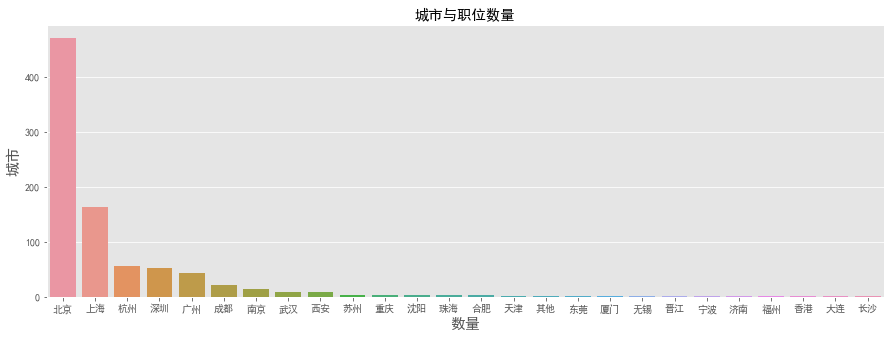

In [233]:
fig,ax1 = plt.subplots(1,1,figsize=(15,5))
sns.barplot(x=city.index,y=city.values)
ax1.set_title('城市与职位数量')
ax1.set_xlabel('数量',fontsize=15)
ax1.set_ylabel('城市',fontsize=15)

In [234]:
city_pct = (city/city.sum()).map(lambda x: '{:.2%}'.format(x))

In [235]:
city_pct[:15].index

Index(['北京', '上海', '杭州', '深圳', '广州', '成都', '南京', '武汉', '西安', '苏州', '重庆', '沈阳',
       '珠海', '合肥', '天津'],
      dtype='object')

In [236]:
data_clean.loc[data_clean['city']=='杭州','com_name'].value_counts()[:5]

非白三维    10
光珀       6
虹软       5
同花顺      4
菜鸟网络     3
Name: com_name, dtype: int64

In [237]:
def top_by_city(df, n=5):
    return df.value_counts()[:n]
data_clean.groupby('city').com_name.apply(top_by_city).loc[city_pct[:15].index]

city               
上海    华院数据             10
      爱奇艺               8
      驭势科技              7
      纵目科技              4
      麦穗人工智能            4
北京    百度               21
      滴滴出行             19
      今日头条             12
      京东金融             10
      恒润科技              9
南京    南京地平线机器人技术        2
      金智信息              2
      小黑鱼科技             2
      佳泰得               1
      趋势科技              1
合肥    乐职网               3
天津    数能科技              1
      天瞳威视              1
广州    网易游戏              5
      探迹                4
      佰聆数据              2
      欢聚时代（多玩YY）        2
      虎牙信息              2
成都    天佑飞天              3
      知道创宇              2
      乐健梦想家             1
      博智信息              1
      同方赛威讯             1
杭州    非白三维             10
      光珀                6
      虹软                5
      同花顺               4
      菜鸟网络              3
武汉    小弦科技              2
      海豚                1
      明日数据              1
      武汉安天              1
      微模式         

In [238]:
data_clean['salary'] = data_clean['avg_wage'] * data_clean['day_per_week'] * 4
data_clean['salary'].mean()

3644.9407744874716

In [239]:
salary_by_city = data_clean['salary'].groupby(data_clean['city']).mean()

In [240]:
salary_by_city.nlargest(5)

city
晋江    9000.000000
长沙    4500.000000
东莞    4150.000000
杭州    4139.345455
福州    4000.000000
Name: salary, dtype: float64

In [241]:
top10_city = salary_by_city[city_pct.index[:10]].sort_values(ascending=False)

Text(0,0.5,'平均工资')

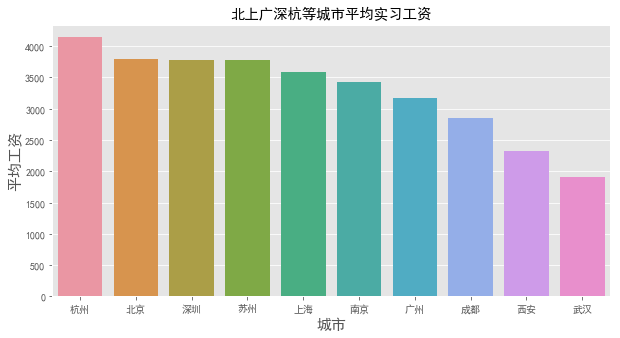

In [242]:
fig,ax1 = plt.subplots(1,1,figsize=(10,5))
sns.barplot(x=top10_city.index,y=top10_city.values)
ax1.set_title('北上广深杭等城市平均实习工资')
ax1.set_xlabel('城市',fontsize=15)
ax1.set_ylabel('平均工资',fontsize=15)

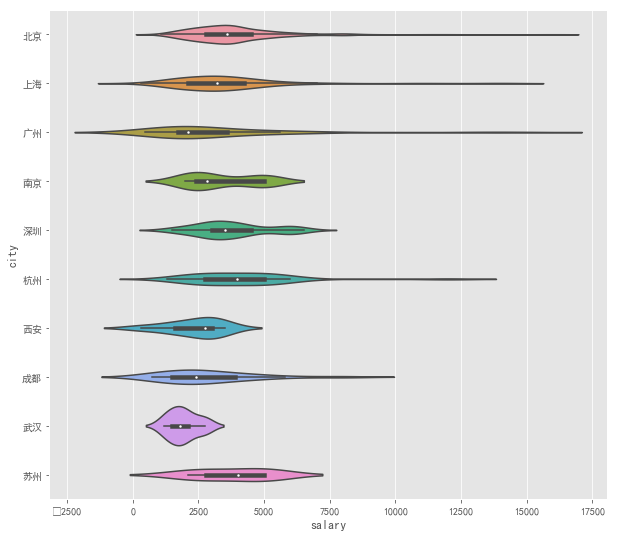

In [243]:
top10_city_box = data_clean.loc[data_clean['city'].isin(top10_city.index)]
fig,ax1 = plt.subplots(1,1,figsize=(10,9))
sns.violinplot(x ='salary', y ='city', data = top10_city_box)

In [244]:
job_academic = data_clean['job_academic'].value_counts()
job_academic

本科    435
硕士    267
不限    160
大专     12
博士      4
Name: job_academic, dtype: int64

([<matplotlib.patches.Wedge at 0x2dac3504e0>,
 [Text(0.0157433,1.09989,'本科'),
  Text(-0.660494,-0.879629,'硕士'),
  Text(0.850467,-0.697643,'不限'),
  Text(1.09718,-0.0786517,'大专'),
  Text(1.29987,-0.0186058,'博士')],
 [Text(0.00858723,0.599939,'49.5%'),
  Text(-0.360269,-0.479798,'30.4%'),
  Text(0.463891,-0.380532,'18.2%'),
  Text(0.598464,-0.0429009,'1.4%'),
  Text(0.799918,-0.0114497,'0.5%')])

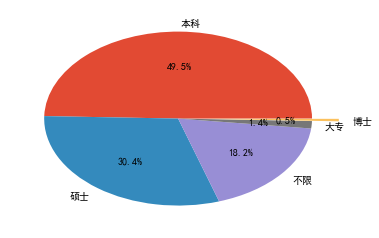

In [245]:
plt.pie(job_academic.values, labels=job_academic.index,explode=(0,0,0,0,0.2),autopct='%1.1f%%')

In [246]:
data_clean.groupby(['job_academic'])['salary'].mean().sort_values()

job_academic
大专    2165.000000
不限    3570.525000
本科    3622.266667
硕士    3786.546816
博士    4075.000000
Name: salary, dtype: float64

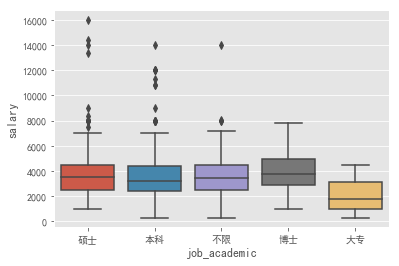

In [247]:
sns.boxplot(x="job_academic", y="salary", data=data_clean)

In [248]:
data_clean['industry'].unique()

array(['计算机/互联网', '互联网', nan, '医药', '企业服务', '互联网,金融/保险', '金融', '金融/保险',
       '生活服务,计算机/互联网', '其他', 'NGO', '通信,计算机/互联网', '餐饮', '生活服务,酒店', '互联网金融',
       '计算机/互联网,金融', '互联网,其它', '计算机/互联网,文化传媒', '软件', '金融,计算机/互联网', '教育培训',
       '文化传媒', '移动互联网', '互联网,电子商务', '制造工业', '计算机/互联网,医药', '机械制造', '建筑房产',
       '计算机/互联网,机械制造', '计算机/互联网,企业服务', '电子', '企业服务,互联网', '文化/传媒',
       '通信/电子,制造', '广告', '计算机/互联网 人力资源', '教育/培训,互联网', '互联网,计算机/互联网',
       '计算机/互联网,教育培训', '计算机/互联网,通信', '互联网,软件', '通信/电子', '电子商务', '在线旅游',
       '互联网,文化/传媒', '计算机/互联网,电子', '咨询', '互联网/金融', '制造', '软件开发', '人工智能',
       '互联网,教育/培训', '信息安全', '信息通信', '机械制造,物流运输', '科研', '电子,计算机/互联网',
       '计算机/互联网,其他', '教育', '通信,电气', '自动化', '互联网,媒体', '计算机/互联网,物流运输',
       '计算机软件', '其它', '科技', '生物/医疗', '建筑/房地产', '汽车电子', '生物/医疗,互联网',
       '软件,企业服务', '物流运输', '医药/生物工程，医疗设备/器械，学术/科研', '网络游戏', '医疗器械',
       '金融,企业服务', '快消,生物/医疗,计算机/互联网', '通信,电子', '无人驾驶', '互联网，文化/传媒',
       '文化传媒,计算机/互联网', '航天/航空'], dtype=object)

In [249]:
industry = data_clean['industry'].str.split('/|,|，| ', expand=True)
industry.sample(5)

,0,1,2,3,4,5
796,生物,医疗,互联网,None,None,None
146,广告,None,None,None,None,None
441,计算机,互联网,None,None,None,None
894,计算机,互联网,None,None,None,None
408,计算机,互联网,None,None,None,None


In [250]:
industry_top15 = industry.apply(pd.value_counts).sum(axis=1).nlargest(15)

Text(0,0.5,'职位数量')

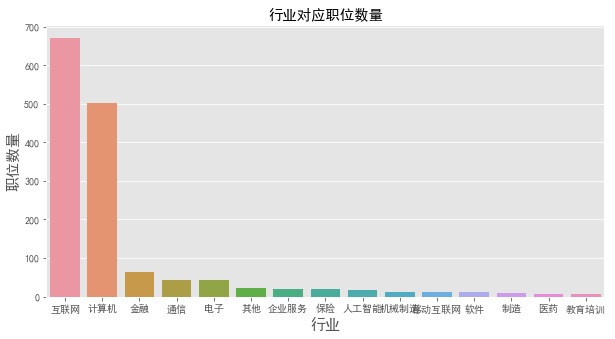

In [251]:
fig,ax1 = plt.subplots(1,1,figsize=(10,5))
sns.barplot(x=industry_top15.index,y=industry_top15.values)
ax1.set_title('行业对应职位数量')
ax1.set_xlabel('行业',fontsize=15)
ax1.set_ylabel('职位数量',fontsize=15)

In [110]:
data_clean.groupby('com_name').salary.agg(['count','mean']).sort_values(by='count', ascending=False)[:15]

,count,mean
com_name,,
百度,21,3256.190476
滴滴出行,19,3614.736842
中科龙智,13,3000.000000
爱奇艺,12,3983.166667
今日头条,12,6400.500000
京东金融,10,4845.000000
非白三维,10,5150.000000
华院数据,10,3290.000000
恒润科技,9,1858.666667


In [111]:
data_clean['num_employee'].value_counts()

小型企业    355
中型企业    283
大型企业    234
Name: num_employee, dtype: int64

In [115]:
data_clean.groupby('num_employee')['salary'].mean()

num_employee
中型企业    3633.823322
大型企业    3497.136752
小型企业    3748.304225
Name: salary, dtype: float64

In [116]:
data_clean['time_span'].value_counts()

3     289
6     190
4     113
7      73
5      67
8      35
10     34
13     20
12     17
9      11
11      8
15      6
16      4
14      4
2       3
18      2
17      1
1       1
Name: time_span, dtype: int64

In [133]:
est = data_clean.drop_duplicates(subset='com_name')
est.head()

,com_fullname,com_name,job_academic,job_links,tag,auth_capital,day_per_week,num_employee,time_span,avg_wage,...,job_deadline,released_time,update_time,city,com_class,com_intro,job_title,com_logo,industry,salary
0,淘宝（中国）软件有限公司,淘宝,硕士,https://www.shixiseng.com/intern/inn_g2vpcs8lukcr,数据挖掘,235875.0000,4,大型企业,3,200.5,...,2018-04-13,7分钟前,2018-03-21 10:48:06,北京,有限责任公司,淘宝网是亚太地区较大的网络零售、商圈,【淘宝】算法工程师/算法专家,https://sxsimg.xiaoyuanzhao.com/FB/BC/FBDB6AC6...,计算机/互联网,3208.0
1,游族网络股份有限公司,游族网络,本科,https://www.shixiseng.com/intern/inn_46watgzrvqsg,软件,27570.9972,5,中型企业,4,220.0,...,2020-12-31,18分钟前,2018-03-21 10:37:22,上海,股份有限公司（上市）,全球领先的互动娱乐供应商,大数据挖掘工程师 （2018校园）,https://sxsimg.xiaoyuanzhao.com/BD/6D/BD305709...,计算机/互联网,4400.0
2,广州网易互动娱乐有限公司,网易游戏,本科,https://www.shixiseng.com/intern/inn_wnfrd8o7wly2,数据挖掘,314.5000,4,大型企业,4,140.0,...,2018-03-31,32分钟前,2018-03-21 10:23:45,广州,有限责任公司,国内中国领先的互联网技术公司，游戏行业领导者。,数据挖掘研究实习生（AI方向）,https://sxsimg.xiaoyuanzhao.com/company_logo/2...,互联网,2240.0
3,百度在线网络技术（北京）有限公司,百度,本科,https://www.shixiseng.com/intern/inn_4jjckpzxx469,数据挖掘,28430.8000,4,大型企业,4,175.0,...,2018-04-02,32分钟前,2018-03-21 10:22:52,北京,有限责任公司,全球最大的中文搜索引擎、最大的中文网站,数据挖掘实习生,https://sxsimg.xiaoyuanzhao.com/0A/80/0A4DB3F4...,互联网,2800.0
5,NaN,NaN,本科,https://www.shixiseng.com/intern/inn_s6dnbuqbhr14,数据挖掘,NaN,4,NaN,3,200.0,...,2018-04-02,38分钟前,2018-03-21 10:17:31,NaN,NaN,NaN,爬虫工程师,NaN,NaN,3200.0


In [136]:
est['est_year'] = pd.DatetimeIndex(est.est_date).year
num_com_by_year = est.groupby('est_year')['com_name'].count()

d:\program\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'num')

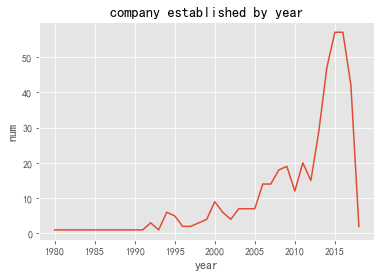

In [132]:
plt.plot(num_com_by_year)
plt.title('company established by year')
plt.xlabel('year')
plt.ylabel('num')

In [168]:
scale_year = est.groupby(['num_employee', 'est_year'])['com_name'].count()
scale_year.unstack(0)

num_employee,中型企业,大型企业,小型企业
est_year,,,
1980.0,NaN,1.0,NaN
1990.0,NaN,1.0,NaN
1991.0,NaN,1.0,NaN
1992.0,NaN,3.0,NaN
1993.0,1.0,NaN,NaN
1994.0,2.0,4.0,NaN
1995.0,3.0,2.0,NaN
1996.0,1.0,NaN,1.0
1997.0,NaN,2.0,NaN


In [143]:
scale_year_s = scale_year['小型企业'].reindex(num_com_by_year.index, fill_value=0)
scale_year_m = scale_year['中型企业'].reindex(num_com_by_year.index, fill_value=0)
scale_year_l = scale_year['大型企业'].reindex(num_com_by_year.index, fill_value=0)

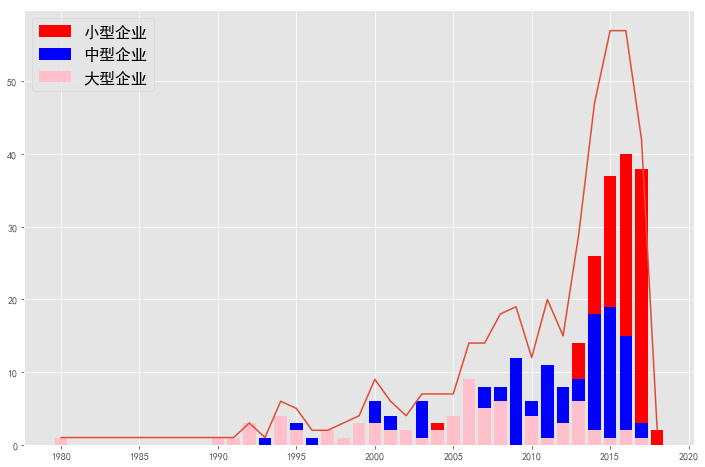

In [162]:
fig,ax1 = plt.subplots(1,1,figsize=(12,8))
p1 = plt.bar(scale_year_s.index,scale_year_s.values, color = "red")
p2 = plt.bar(scale_year_s.index,scale_year_m.values, color = "b")
p3 = plt.bar(scale_year_s.index,scale_year_l.values, color = "pink")
plt.legend([p1,p2,p3], ['小型企业', '中型企业', '大型企业'], prop={'size':16})
plt.plot(num_com_by_year)

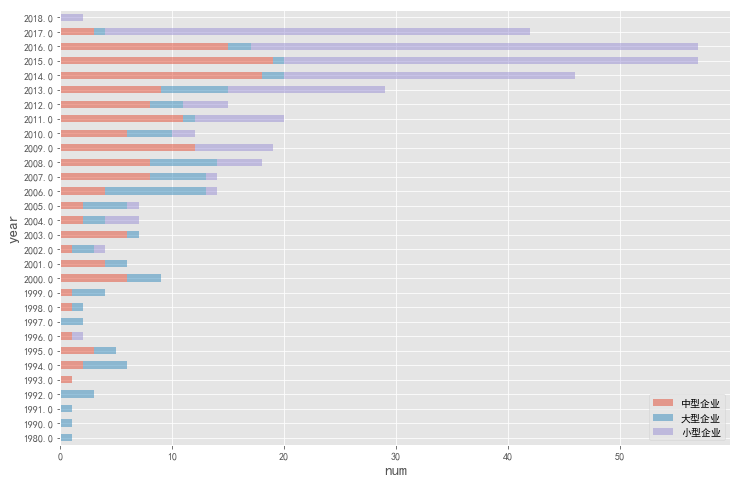

In [178]:
scale_year.unstack(0).plot.barh(stacked=True, alpha=0.5,figsize=(12,8))
plt.xlabel('num',fontsize=15)
plt.ylabel('year',fontsize=15)
plt.legend()

In [253]:
E_data = data_clean.loc[(data_clean['city'] == '成都') & 
               (data_clean['job_academic'] != '博士') & 
               (data_clean['released_time'] == 'newest')]

In [254]:
E_data['com_name']

42      天佑飞天
52      天佑飞天
53      天佑飞天
92      知道创宇
362     小多科技
463     通甲优博
474     风雷体育
475    乐健梦想家
502     知道创宇
Name: com_name, dtype: object

In [255]:
data.loc[E_data.index, ['job_title', 'job_links']]

,job_title,job_links
42,linux 网络软件助理工程师,https://www.shixiseng.com/intern/inn_pj90bwhyjdzr
52,linux 网络软件助理工程师,https://www.shixiseng.com/intern/inn_eaigmvuttt2q
53,Linux系统助理工程师,https://www.shixiseng.com/intern/inn_ailkb1tuvx6y
92,数据分析实习生,https://www.shixiseng.com/intern/inn_qipeucrxejoe
362,语音识别算法研发工程师（实习）,https://www.shixiseng.com/intern/inn_abmeodrpz2q3
463,计算机视觉实习生,https://www.shixiseng.com/intern/inn_yvbifihq6lna
474,视频图像算法实习生,https://www.shixiseng.com/intern/inn_olbp4jlguhuv
475,视频图像算法实习生,https://www.shixiseng.com/intern/inn_aheorkagdbjt
502,运营管理实习生,https://www.shixiseng.com/intern/inn_vgw8dbeflgud


In [256]:
import os
import requests
from PIL import Image

data_logo = data_clean[['com_logo', 'com_name']]
data_logo.drop_duplicates(subset='com_name', inplace=True)
data_logo.dropna(inplace=True)
data_logo['com_name'] = data_logo['com_name'].str.replace('/', '-')
com_logo = list(data_logo['com_logo'])
com_name = list(data_logo['com_name'])

path_list = []
num_logo = 0
os.mkdir(r'C:\Users\Mr.You\Desktop\y\shixiseng\logo')
for logo_index in range(len(com_logo)):
    try:
        response = requests.get(com_logo[logo_index])
        suffix = com_logo[logo_index].split('.')[-1]
        path = r'C:\Users\Mr.You\Desktop\y\shixiseng\logo\{}.{}'.format(com_name[logo_index], suffix)
        path_list.append(path)
        with open(path, 'wb') as f:
            f.write(response.content)
        num_logo += 1
    except:
        print('Failed downloading logo of', com_name[logo_index])
print('Successfully downloaded ', str(num_logo), 'logos!')

d:\program\python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
d:\program\python\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
d:\program\python\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Failed downloading logo of 懂车帝| 今日头条
Successfully downloaded  458 logos!


In [257]:
x = y = 0
line = 20
NewImage = Image.new('RGB', (128*line, 128*line))
for item in path_list:
    try:
        img = Image.open(item)
        img = img.resize((128, 128), Image.ANTIALIAS)
        NewImage.paste(img, (x * 128, y * 128))
        x += 1
    except IOError:
        print("第%d行,%d列文件读取失败！IOError:%s" % (y, x, item))
        x -= 1
    if x == line:
        x = 0
        y += 1
    if (x + line * y) == line * line:
        break
NewImage.save(r'C:\Users\Mr.You\Desktop\y\shixiseng\logo.jpg')

第7行,8列文件读取失败！IOError:C:\Users\Mr.You\Desktop\y\shixiseng\logo\懂车帝| 今日头条.jpg
